In [1]:
import pandas as pd
import os

current_dir = os.getcwd()
data_path = os.path.join(current_dir, 'batsman_df.csv')

batsman_df = pd.read_csv(data_path)
batsman_df

,name,country,role,bat_style,t20_no,t20_runs,t20_avg,t20_sr,t20_50,t20_4s,t20_6s,ipl_no,ipl_runs,ipl_avg,ipl_sr,ipl_50,ipl_4s,ipl_6s
0,devon conway,new zealand,wk-batsman,left-handed-bat,9,1408,38.05,127.77,10,135,37,3,924,48.63,141.29,9,99,30
1,rahul tripathi,india,batsman,right-handed-bat,0,97,19.40,144.78,0,11,5,10,2236,26.94,139.32,12,223,84
2,kl rahul,india,wk-batsman,right-handed-bat,8,2265,37.75,139.13,22,191,99,20,4683,45.47,134.61,37,400,187
3,jake fraser-mcgurk,australia,batsman,right-handed-bat,0,113,16.14,143.04,1,16,3,0,330,36.67,234.05,4,32,28
4,harry brook,england,batsman,right-handed-bat,9,798,28.50,146.16,4,65,34,2,190,21.11,123.38,0,23,4
5,faf du plessis,south africa,batsman,right-handed-bat,7,1528,35.53,134.39,10,140,50,11,4571,35.99,136.37,37,421,166
6,sameer rizvi,india,batsman,right-handed-bat,0,0,0.00,0.00,0,0,0,1,51,12.75,118.61,0,4,2
7,donovan ferreira,south africa,wk-batsman,right-handed-bat,0,79,15.80,158.00,0,2,6,0,8,4.00,72.73,0,0,0
8,karun nair,india,batsman,right-handed-bat,0,0,0.00,0.00,0,0,0,5,1496,23.75,127.76,10,161,39
9,jos buttler,england,wk-batsman,right-handed-bat,23,3535,35.35,146.62,26,322,152,12,3582,38.11,147.53,19,355,161


In [2]:
import numpy as np

df = batsman_df.copy()

df['ipl_matches'] = (df['ipl_runs'] / df['ipl_avg']).replace([np.inf, -np.inf], 0).fillna(0)
df['t20_matches'] = (df['t20_runs'] / df['t20_avg']).replace([np.inf, -np.inf], 0).fillna(0)

# IPL Level
df['ipl_boundary_runs'] = df['ipl_4s']*4 + df['ipl_6s']*6
df['ipl_boundary_percent'] = df['ipl_boundary_runs'] / df['ipl_runs']
df['ipl_50_rate'] = df['ipl_50'] / df['ipl_matches']
df['ipl_exp_score'] = df['ipl_runs'] / df['ipl_matches']

# T20 Level
df['t20_boundary_runs'] = df['t20_4s']*4 + df['t20_6s']*6
df['t20_boundary_percent'] = df['t20_boundary_runs'] / df['t20_runs']
df['t20_50_rate'] = df['t20_50'] / df['t20_matches']
df['t20_exp_score'] = df['t20_runs'] / df['t20_matches']


def classify_batting_style(row):
    if row['ipl_avg'] >= 30 and row['ipl_sr'] < 135 and row['ipl_50_rate'] >= 0.2:
        return 'anchor'
    elif row['t20_avg'] >= 30 and row['t20_sr'] < 135 and row['t20_50_rate'] >= 0.2:
        return 'anchor'
    elif row['ipl_sr'] >= 140 and row['ipl_boundary_percent'] >= 0.6:
        return 'aggressive'
    elif row['t20_sr'] >= 140 and row['t20_boundary_percent'] >= 0.6:
        return 'aggressive'
    else:
        return 'balanced'

df['position'] = df.apply(classify_batting_style, axis=1)

df['is_anchor'] = (df['position'] == 'anchor').astype(int)
df['is_aggressive'] = (df['position'] == 'aggressive').astype(int)
df['is_balanced'] = (df['position'] == 'balanced').astype(int)

df = df.drop(columns=['position'])

In [3]:
batting_roles = {
    "ajinkya rahane": "Top-order",
    "phil salt": "Top-order",
    "rilee rossouw": "Top-order",
    "srikar bharat": "Finisher",
    "n jagadeesan": "Top-order",
    "mandeep singh": "Middle-order",
    "litton das": "Top-order",
    "nicholas pooran": "Top-order",
    "vishnu vinod": "Top-order",
    "harpreet singh bhatia": "Middle-order",
    "donovan ferreira": "Finisher",
    "harry brook": "Finisher",
    "heinrich klaasen": "Finisher",
    "anmolpreet singh": "Top-order",
    "mayank agarawal": "Top-order",
    "sameer rizvi": "Middle-order",
    "ricky bhui": "Top-order",
    "shai hope": "Top-order",
    "kumar kushagra": "Middle-order",
    "tristan stubbs": "Finisher",
    "angkrish raghuvanshi": "Top-order",
    "naman dhir": "Middle-order",
    "shubham dubey": "Finisher",
    "rovman powell": "Finisher",
    "tom kohler-cadmore": "Top-order",
    "saurav chauhan": "Middle-order",
    "travis head": "Top-order",
    "devon conway": "Top-order",
    "rahul tripathi": "Top-order",
    "kl rahul": "Top-order",
    "jake fraser-mcgurk": "Top-order",
    "faf du plessis": "Top-order",
    "karun nair": "Middle-order",
    "jos buttler": "Top-order",
    "anuj rawat": "Top-order",
    "quinton de kock": "Top-order",
    "rahmanullah gurbaz": "Top-order",
    "rishabh pant": "Finisher",
    "david miller": "Finisher",
    "aiden markram": "Middle-order",
    "matthew breetzke": "Top-order",
    "ryan rickelton": "Top-order",
    "josh inglis": "Middle-order",
    "nitish rana": "Finisher",
    "jitesh sharma": "Finisher",
    "tim david": "Finisher",
    "devdutt padikkal": "Top-order",
    "ishan kishan": "Top-order",
    "abhinav manohar": "Middle-order",
    "sachin baby": "Middle-order",
    "atharva taide": "Top-order"
}

df['batting_position'] = df['name'].map(batting_roles)

In [4]:
df['overseas'] = (df['country'].str.lower() != 'india').astype(int)

In [5]:
batsman_graph = df[[
    'name', 'role', 'bat_style', 'ipl_exp_score', 't20_exp_score',
    'is_anchor', 'is_aggressive', 'is_balanced', 'batting_position', 'overseas'
]]

In [6]:
batsman_graph = batsman_graph.fillna(0)

In [7]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_path = os.path.join(parent_dir, 'auction_data.csv')

auction = pd.read_csv(data_path)

In [8]:
auction = auction[['player', 'year', 'price']]
auction = auction[auction['year'] == 2025]

In [9]:
auction['player_lower'] = auction['player'].str.lower()
batsman_graph = batsman_graph.merge(
    auction[['player_lower', 'price']],
    left_on='name',
    right_on='player_lower',
    how='left'
)
batsman_graph = batsman_graph.drop(columns=['player_lower'])
batsman_graph['price'] = batsman_graph['price']/10000000
batsman_graph

,name,role,bat_style,ipl_exp_score,t20_exp_score,is_anchor,is_aggressive,is_balanced,batting_position,overseas,price
0,devon conway,wk-batsman,left-handed-bat,48.63,38.05,1,0,0,Top-order,1,6.25
1,rahul tripathi,batsman,right-handed-bat,26.94,19.40,0,1,0,Top-order,0,3.40
2,kl rahul,wk-batsman,right-handed-bat,45.47,37.75,1,0,0,Top-order,0,14.00
3,jake fraser-mcgurk,batsman,right-handed-bat,36.67,16.14,0,1,0,Top-order,1,9.00
4,harry brook,batsman,right-handed-bat,21.11,28.50,0,0,1,Finisher,1,6.25
5,faf du plessis,batsman,right-handed-bat,35.99,35.53,1,0,0,Top-order,1,2.00
6,sameer rizvi,batsman,right-handed-bat,12.75,0.00,0,0,1,Middle-order,0,0.95
7,donovan ferreira,wk-batsman,right-handed-bat,4.00,15.80,0,0,1,Finisher,1,0.75
8,karun nair,batsman,right-handed-bat,23.75,0.00,0,0,1,Middle-order,0,0.50
9,jos buttler,wk-batsman,right-handed-bat,38.11,35.35,0,1,0,Top-order,1,15.75


In [10]:
def compute_synergy(u, v):
    synergy = 0.0

    # Complementary styles
    if u['is_anchor'] and v['is_aggressive'] or v['is_anchor'] and u['is_aggressive']:
        synergy += 0.8
    elif u['is_balanced'] or v['is_balanced']:
        synergy += 0.4

    # Complementary positions
    if u['batting_position'] != v['batting_position']:
        synergy += 0.4
    else:
        synergy -= 0.3

    # Role diversity
    if u['role'] != v['role']:
        synergy += 0.3
    else:
        if u['role'] == 'wk-batsman':
            synergy -= 0.4

    # Batting style
    if u['bat_style'] == v['bat_style']:
        synergy -= 0.4

    # Overseas synergy adjustment
    if u['overseas'] == 1 and v['overseas'] == 1:
        synergy -= 0.5
    elif u['overseas'] == 0 and v['overseas'] == 0:
        synergy += 0.5

    # Use ipl_exp_score and t20_exp_score
    ipl_avg = (u.get('ipl_exp_score', 0) + v.get('ipl_exp_score', 0)) / 2
    t20_avg = (u.get('t20_exp_score', 0) + v.get('t20_exp_score', 0)) / 2

    if ipl_avg > 30:
        synergy += 0.5
    elif ipl_avg < 15:
        synergy -= 0.2

    if t20_avg > 30:
        synergy += 0.5
    elif t20_avg < 15:
        synergy -= 0.2

    return synergy


In [11]:
import networkx as nx
import pandas as pd

df = batsman_graph

G = nx.Graph()

# Add players as nodes
for idx, row in df.iterrows():
    G.add_node(row['name'], **row.to_dict())

# Add synergy edges
for i in range(len(df)):
    for j in range(i + 1, len(df)):
        u = df.iloc[i]
        v = df.iloc[j]
        synergy = compute_synergy(u, v)
        if synergy > 0:  # Only keep meaningful synergy edges
            G.add_edge(u['name'], v['name'], weight=synergy)

C:\Users\Akindu Himan\AppData\Local\Temp\ipykernel_41468\2983942470.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')  # You can change to 'viridis', 'plasma', etc.


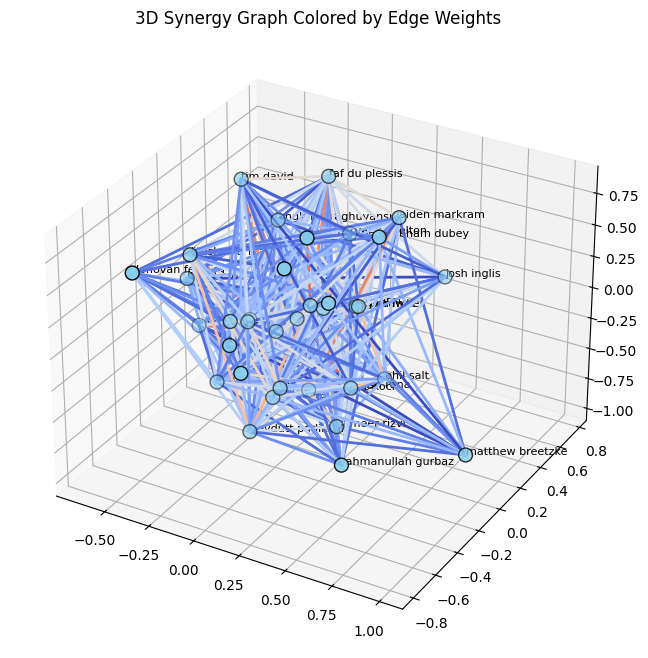

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

# 3D layout (spring layout in 3D)
def spring_layout_3d(G, dim=3, seed=42):
    import random
    random.seed(seed)
    pos_2d = nx.spring_layout(G, dim=2, seed=seed)
    pos_3d = {}
    for node in G.nodes():
        pos_3d[node] = np.append(pos_2d[node], np.random.uniform(-1, 1))  # Add Z
    return pos_3d

# Generate 3D positions
pos_3d = spring_layout_3d(G)

# Extract edge weights and normalize them
edge_weights = nx.get_edge_attributes(G, 'weight')
weights = list(edge_weights.values())
norm = colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = cm.get_cmap('coolwarm')  # You can change to 'viridis', 'plasma', etc.
edge_colors = [cmap(norm(w)) for w in weights]

# Map edge to its color
edge_color_map = {edge: color for edge, color in zip(edge_weights, edge_colors)}

# Start plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw edges with colors based on weight
for i, (u, v) in enumerate(G.edges()):
    x = [pos_3d[u][0], pos_3d[v][0]]
    y = [pos_3d[u][1], pos_3d[v][1]]
    z = [pos_3d[u][2], pos_3d[v][2]]
    w = G[u][v]['weight']
    ax.plot(x, y, z, c=cmap(norm(w)), linewidth=2)

# Draw nodes
xs, ys, zs = zip(*[pos_3d[node] for node in G.nodes()])
ax.scatter(xs, ys, zs, s=100, c='skyblue', edgecolors='black')

# Add node labels
for node in G.nodes():
    x, y, z = pos_3d[node]
    ax.text(x, y, z, node, size=8, zorder=1)

ax.set_title("3D Synergy Graph Colored by Edge Weights")
plt.show()

In [13]:
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, LpBinary, GUROBI
import networkx as nx

def optimize_team(df, G, limits, budget):
    player_names = df['name'].tolist()
    x = {name: LpVariable(f"x_{name}", cat=LpBinary) for name in player_names}

    prob = LpProblem("Maximize_Synergy", LpMaximize)

    # Create auxiliary variables for edge synergy
    y = {}
    for u, v, data in G.edges(data=True):
        if u in x and v in x:
            var_name = f"y_{u}_{v}"
            y[(u, v)] = LpVariable(var_name, cat=LpBinary)
            # Constraints for AND logic
            prob += y[(u, v)] <= x[u]
            prob += y[(u, v)] <= x[v]
            prob += y[(u, v)] >= x[u] + x[v] - 1

    # Objective: Maximize synergy
    prob += lpSum([y[(u, v)] * data['weight'] for (u, v), data in G.edges.items() if (u, v) in y])

    # Position & overseas constraints
    for cat in ['Top-order', 'Middle-order', 'Finisher']:
        cat_players = df[df['batting_position'] == cat]
        player_names_in_cat = cat_players['name']
        prob += lpSum([x[name] for name in player_names_in_cat]) == limits[cat]

        # Overseas limit per category
        overseas_players = cat_players[cat_players['overseas'] == 1]['name']
        prob += lpSum([x[name] for name in overseas_players]) <= 1

    # Total player count
    prob += lpSum(x[name] for name in player_names) == sum(limits.values())

    # Budget constraint
    prob += lpSum([x[name] * df[df['name'] == name]['price'].values[0] for name in player_names]) <= budget


    prob.solve()
    # Return selected team
    return [name for name in player_names if x[name].varValue == 1]


In [14]:
# Option to specify players to remove before optimization
players_to_remove = ['kl rahul','nitish rana','tim david']

# Remove specified players from batsman_graph
filtered_batsman_graph = batsman_graph[~batsman_graph['name'].isin(players_to_remove)].copy()

limits = {
    'Top-order': 4,
    'Middle-order': 3,
    'Finisher': 2,
}
budget = 27

best_team = optimize_team(filtered_batsman_graph, G, limits, budget)
print("Optimized Team:", best_team)

selected_rows = filtered_batsman_graph[filtered_batsman_graph['name'].isin(best_team)].sort_values('batting_position', ascending=False)
total_cost = selected_rows['price'].sum()
print("Total Cost:", total_cost)
selected_rows

Optimized Team: ['devon conway', 'karun nair', 'anuj rawat', 'ajinkya rahane', 'shubham dubey', 'jitesh sharma', 'devdutt padikkal', 'abhinav manohar', 'sachin baby']
Total Cost: 25.85


,name,role,bat_style,ipl_exp_score,t20_exp_score,is_anchor,is_aggressive,is_balanced,batting_position,overseas,price
0,devon conway,wk-batsman,left-handed-bat,48.63,38.05,1,0,0,Top-order,1,6.25
11,anuj rawat,wk-batsman,left-handed-bat,19.88,0.00,0,0,1,Top-order,0,0.30
15,ajinkya rahane,batsman,right-handed-bat,30.14,20.83,0,0,1,Top-order,0,1.50
30,devdutt padikkal,batsman,left-handed-bat,25.15,19.00,0,0,1,Top-order,0,2.00
8,karun nair,batsman,right-handed-bat,23.75,0.00,0,0,1,Middle-order,0,0.50
32,abhinav manohar,batsman,right-handed-bat,16.50,0.00,0,0,1,Middle-order,0,3.20
33,sachin baby,batsman,left-handed-bat,16.00,0.00,0,0,1,Middle-order,0,0.30
26,shubham dubey,batsman,left-handed-bat,16.50,0.00,0,1,0,Finisher,0,0.80
28,jitesh sharma,wk-batsman,right-handed-bat,22.81,14.29,0,1,0,Finisher,0,11.00
